In [1]:
#Import Libraries for Data Cleaning and Analysis

import numpy as np 
import pandas as pd

In [98]:
# read the file

dataset = pd.read_csv(r"C:\Users\BS . AMIRTHA\Downloads\Premier_League_Final_Data_set.csv")

A) Exploring the Dataset

In [99]:
dataset.head() #viewing the first five rows

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
0,1Arsenal,1182,642,252,288,2089,448,1886,3.0,6,Apr-23
1,2Aston Villa,1062,368,399,295,1306,311,1874,0.0,1,Apr-23
2,3Birmingham City,266,73,111,82,273,66,1875,0.0,NaN,May-11
3,4Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,May-12
4,5Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,May-12


### Dataset Overview and Initial Observations

Based on the information provided, we have 11 columns in the dataset. The first column specifies the club name, while the other columns describe the club's performance in the Premier League. Key observations include:

- The "Club" column contains numerical values attached to strings, which should be cleaned.
- The "Runners-up" column contains some null values that need to be addre

  Further analysing the dataset ssed.

In [100]:
dataset.tail()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
35,36West Bromwich Albion,494,117,238,139,510,107,1878,NaN,0,Apr-18
36,37West Ham United,1025,343,423,259,1262,266,1895,NaN,0,Apr-23
37,38Wigan Athletic,304,85,143,76,316,73,1932,NaN,0,Apr-13
38,39Wolverhampton Wanderers,334,98,151,85,353,75,1877,0.0,0,Apr-23
39,40Portsmouth,266,79,122,65,292,61,April 1898,NaN,NaN,Apr-10


### Data Consistency and Quality Issues

- The "Team Launch" column shows inconsistency, with most entries displaying only the year while some include the month. This inconsistency should be addressed to avoid issues during analysis.
- The "Winners" column contains some null values that need to be handled.

In [101]:
# size of the dataset
dataset.shape

(40, 11)

In [102]:
# To get more information on datatypes and null values in the dataframe

dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Club            40 non-null     object 
 1   Matches Played  40 non-null     int64  
 2   Win             40 non-null     int64  
 3   Loss            40 non-null     int64  
 4   Drawn           40 non-null     int64  
 5   Goals           40 non-null     int64  
 6   Clean Sheets    40 non-null     int64  
 7   TeamLaunch      40 non-null     object 
 8   Winners         25 non-null     float64
 9   Runners-up      22 non-null     object 
 10  lastplayed_pl   40 non-null     object 
dtypes: float64(1), int64(6), object(4)
memory usage: 3.6+ KB


### Data Quality Observations

- The "Winners" and "Runners-up" columns contain null values that need to be addressed.
- The "Runners-up" column is currently of object type (non-numeric). To perform numerical analysis on this column, it must be converted to a numeric data type.

B) Cleaning the Dataset

In [103]:
#Cleaning Club Column


dataset['Club'] = dataset['Club'].str.translate(str.maketrans('', '', '0123456789'))


#The code removes all numerical digits from the strings in the "Club" column
# It uses str.translate to apply this translation to each string in the column.

In [104]:
dataset.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
0,Arsenal,1182,642,252,288,2089,448,1886,3.0,6,Apr-23
1,Aston Villa,1062,368,399,295,1306,311,1874,0.0,1,Apr-23
2,Birmingham City,266,73,111,82,273,66,1875,0.0,NaN,May-11
3,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,May-12
4,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,May-12


Now that the numerical digits have been removed from the beginning of each club name in the "Club" column, the data has been cleaned and is ready for analysis.

In [105]:
#Checking for the number of null values in the "Winners" column
dataset['Winners'].isnull()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24     True
25     True
26     True
27     True
28     True
29     True
30     True
31     True
32     True
33     True
34     True
35     True
36     True
37     True
38    False
39     True
Name: Winners, dtype: bool

In [106]:
dataset['Winners'].isnull().any()
## The any() method is then used to check if there is at least one True value in the Series, indicating the presence of null values in the "Winners" column.

True

In [107]:
dataset['Winners'].value_counts()

Winners
0.0     18
1.0      3
3.0      1
5.0      1
6.0      1
13.0     1
Name: count, dtype: int64

First, we need to interpret the numbers in the "Winners" column. They indicate that:

- 18 clubs did not win any titles.
- 3 clubs won once each.
- 1 club won three times.
- 5 clubs won five times each.
- 1 club won six times.
- 1 club won thirteen times.

This data covers 30 matches held from 1992 to 2022, reflecting the number of wins each team has achieved. Since the clubs with NaN values in the "Winners" column have not won any Premier League titles, these NaN values should be replaced with 0. This data cleaning step ensures the dataset accurately represents each club's historical performance in terms of Premier League wins.

In [108]:
# Replace null values with 0 in the "Winners" column
dataset['Winners'].fillna(0, inplace = True)
# .fillna(0, inplace=True) This is a method in pandas that is used to fill missing (null) values in a Series or DataFrame. 
# In this case, it is applied to the "Winners" column of the DataFrame df to fill any null values with the value 0.

C:\Users\BS . AMIRTHA\AppData\Local\Temp\ipykernel_5492\1472292939.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Winners'].fillna(0, inplace = True)


In [109]:
# Check if there are any null values

dataset['Winners'].isnull().any()

False

In [110]:
#Let's examine the "Runners-up" column 

dataset['Runners-up'].value_counts()

Runners-up
0    10
1     3
-     3
6     1
4     1
5     1
3     1
7     1
2     1
Name: count, dtype: int64

In [111]:
dataset['Runners-up'].isnull().any() #There are few null values 

True

From the dataset, we observe the following for the "Runners-up" column:

- 10 teams did not achieve the runner-up position.
- 3 teams finished as runners-up once.
- 1 team finished as runners-up six times.
- 1 team finished as runners-up four times.
- 1 team finished as runners-up five times.
- 1 team finished as runners-up three times.
- 1 team finished as runners-up seven times.
- 1 team finished as runners-up twice.

There are a few null values and '-' symbols that should be replaced with zero to ensure accurate analysis. Since there were 30 matches held, teams that have not been listed as runners-up should have their values filled accordingly to reflect the full dataset accurately.

In [112]:
dataset['Runners-up'].fillna(0, inplace = True)
dataset['Runners-up'].replace('-', 0, inplace=True)
# replace() method is used to replace the "-" values with zero. The inplace=True argument is used to modify the original dataframe.

C:\Users\BS . AMIRTHA\AppData\Local\Temp\ipykernel_5492\757703465.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Runners-up'].fillna(0, inplace = True)


In [113]:
# We noted that the "Runners-up" column was of object type. Now, we need to convert it to an integer data type.
dataset['Runners-up'] = pd.to_numeric(dataset['Runners-up'], errors = 'coerce')
dataset['Runners-up'] = dataset['Runners-up'].astype('Int64')

This code is converting the "Runners-up" column in a pandas DataFrame, df, from an "Object" data type to an "Int64" data type.

The first line uses the pd.to_numeric() function to attempt to convert the "Runners-up" column to a numeric data type. The errors='coerce' argument tells the function to replace any values that cannot be converted to a number with NaN.

The second line uses the .astype() method to convert the "Runners-up" column to an "Int64" data type. The .astype() method is called on the "Runners-up" column of the DataFrame, and the argument "Int64" specifies the desired data type.

In [114]:
#check the datatype
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Club            40 non-null     object 
 1   Matches Played  40 non-null     int64  
 2   Win             40 non-null     int64  
 3   Loss            40 non-null     int64  
 4   Drawn           40 non-null     int64  
 5   Goals           40 non-null     int64  
 6   Clean Sheets    40 non-null     int64  
 7   TeamLaunch      40 non-null     object 
 8   Winners         40 non-null     float64
 9   Runners-up      40 non-null     Int64  
 10  lastplayed_pl   40 non-null     object 
dtypes: Int64(1), float64(1), int64(6), object(3)
memory usage: 3.6+ KB


We can see that the data type of the "Runners-up" column has been successfully changed.

In [115]:
dataset['TeamLaunch'].value_counts()

TeamLaunch
1878           3
1886           2
1905           2
1874           2
1892           2
1879           2
1884           2
1882           2
1875           2
1895           1
1881           1
1904           1
1932           1
1912           1
1863           1
1877           1
1885           1
1867           1
1889           1
1894           1
1865           1
1902           1
1876           1
1919           1
16 Oct 1878    1
1861           1
Aug 1883       1
1901           1
1899           1
April 1898     1
Name: count, dtype: int64

Here, we observe that the "Team Launch" column indicates the year each team was founded. For example, three teams were launched in 1878. However, some entries also include the date and month, which should be addressed.

In [116]:
# we need to convert team launch into year

#convert the column into datetime format
dataset['TeamLaunch'] = pd.to_datetime(dataset['TeamLaunch'], errors = 'coerce')

# convert the column to YYYY format
dataset['TeamLaunch'] = dataset['TeamLaunch'].dt.strftime('%Y')

The first line of code converts the column 'column_name' to datetime format using the pandas to_datetime() function. The 'errors' parameter is set to 'coerce', which means that any invalid dates will be set to NaT (Not a Time) in the resulting datetime column.

The second line of code uses the dt.strftime() method to convert the datetime column to a string column with only the year values. '%Y' is the format code for the year. This line of code will create a new column 'column_name' in the format YY.YY

In [117]:
#check
dataset['TeamLaunch'].value_counts()

TeamLaunch
1878    3
1886    2
1905    2
1874    2
1892    2
1879    2
1884    2
1882    2
1875    2
1881    1
1889    1
1895    1
1912    1
1932    1
1863    1
1885    1
1867    1
1894    1
1904    1
1865    1
1902    1
1876    1
1919    1
1861    1
1901    1
1899    1
1877    1
Name: count, dtype: int64

We also observed that the "last played" column was of type object. This should be processed and converted into an integer data type.

In [118]:
dataset.dtypes['lastplayed_pl']

dtype('O')

In [119]:
dataset['lastplayed_pl']

0     Apr-23
1     Apr-23
2     May-11
3     May-12
4     May-12
5     Apr-23
6     Apr-23
7     Apr-22
8     May-07
9     Apr-23
10    Apr-01
11    Apr-23
12    Apr-08
13    Apr-23
14    Apr-23
15    Apr-02
16    Apr-23
17    Apr-23
18    Apr-23
19    Apr-23
20    Apr-23
21    Apr-17
22    Apr-23
23    Apr-22
24    Apr-23
25    Apr-17
26    Apr-15
27    Apr-21
28    Apr-00
29    Apr-23
30    Apr-18
31    Apr-17
32    Apr-18
33    Apr-23
34    Apr-22
35    Apr-18
36    Apr-23
37    Apr-13
38    Apr-23
39    Apr-10
Name: lastplayed_pl, dtype: object

In [120]:
dataset['lastplayed_pl'] = pd.to_datetime(dataset['lastplayed_pl'], format='%b-%y', errors='coerce')


In [121]:
dataset['lastplayed_pl'] 

0    2023-04-01
1    2023-04-01
2    2011-05-01
3    2012-05-01
4    2012-05-01
5    2023-04-01
6    2023-04-01
7    2022-04-01
8    2007-05-01
9    2023-04-01
10   2001-04-01
11   2023-04-01
12   2008-04-01
13   2023-04-01
14   2023-04-01
15   2002-04-01
16   2023-04-01
17   2023-04-01
18   2023-04-01
19   2023-04-01
20   2023-04-01
21   2017-04-01
22   2023-04-01
23   2022-04-01
24   2023-04-01
25   2017-04-01
26   2015-04-01
27   2021-04-01
28   2000-04-01
29   2023-04-01
30   2018-04-01
31   2017-04-01
32   2018-04-01
33   2023-04-01
34   2022-04-01
35   2018-04-01
36   2023-04-01
37   2013-04-01
38   2023-04-01
39   2010-04-01
Name: lastplayed_pl, dtype: datetime64[ns]

In [122]:
# Extract year
dataset['lastplayed_pl'] = dataset['lastplayed_pl'].dt.year

In [123]:
dataset['lastplayed_pl'] #successfully got extracted

0     2023
1     2023
2     2011
3     2012
4     2012
5     2023
6     2023
7     2022
8     2007
9     2023
10    2001
11    2023
12    2008
13    2023
14    2023
15    2002
16    2023
17    2023
18    2023
19    2023
20    2023
21    2017
22    2023
23    2022
24    2023
25    2017
26    2015
27    2021
28    2000
29    2023
30    2018
31    2017
32    2018
33    2023
34    2022
35    2018
36    2023
37    2013
38    2023
39    2010
Name: lastplayed_pl, dtype: int32

C) Data Analysis

Checklist for Reviewing Datasets Using .describe()


Count (count)
What to Note: Number of non-null (non-missing) entries in the column.
Why It Matters: Ensures you have enough data points for meaningful analysis. Low counts relative to the dataset size may indicate missing data issues.

Mean (mean)

What to Note: The average value of the data.
Why It Matters: Provides an idea of the central value. Compare it with the median to check for skewness.

Standard Deviation (std)

What to Note: The spread of the data around the mean.
Why It Matters: High standard deviation indicates data points are widely spread out; low standard deviation indicates they are clustered close to the mean.

Minimum (min)

What to Note: The smallest value in the data.
Why It Matters: Useful for identifying potential outliers or errors in the data.

25th Percentile (25% or 1st Quartile)

What to Note: The value below which 25% of the data falls.
Why It Matters: Provides insight into the lower end of the data distribution.

Median (50% or 2nd Quartile)

What to Note: The middle value of the data.
Why It Matters: A robust measure of central tendency, especially when the data is skewed.

75th Percentile (75% or 3rd Quartile)

What to Note: The value below which 75% of the data falls.
Why It Matters: Provides insight into the upper end of the data distribution.

Maximum (max)

What to Note: The largest value in the data.
Why It Matters: Useful for identifying potential outliers or errors in the data.

Steps to Review Each Dataset
Check the Count:

Ensure the count is close to the expected number of data points. Significant deviations might indicate missing data.

Evaluate the Mean and Median:

Compare the mean and median to assess skewness.
If Mean ≈ Median: The data is roughly symmetric.
If Mean > Median: The data is right-skewed.
If Mean < Median: The data is left-skewed.

Analyze the Spread (Standard Deviation):

A higher standard deviation indicates more variability in the data.
Compare the standard deviation to the range (max - min) to understand the dispersion relative to the overall range.

Inspect the Min and Max Values:

Check for unusually high or low values that might be outliers.
Compare with the 25th and 75th percentiles to see if the extremes are far from the central mass of the data.

Review the Percentiles (25%, 50%, 75%):

Understand the distribution within the interquartile range (IQR = 75% - 25%).
The IQR provides insight into the middle 50% of the data.

Identify Potential Outliers:

Values that fall below (25% - 1.5IQR) or above (75% + 1.5IQR) are potential outliers.
Investigate these values to determine if they are genuine data points or errors.

In [125]:
dataset.describe()

,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,Winners,Runners-up,lastplayed_pl
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.0,40.000000
mean,573.750000,215.450000,210.425000,147.875000,769.000000,167.925000,0.750000,0.75,2018.000000
std,358.986519,194.164608,102.132364,88.873632,627.746478,135.561584,2.372384,1.750458,6.876195
min,190.000000,41.000000,85.000000,48.000000,181.000000,45.000000,0.000000,0.0,2000.000000
25%,275.000000,80.500000,127.500000,71.500000,304.500000,66.000000,0.000000,0.0,2014.500000
50%,443.000000,116.500000,193.500000,120.000000,462.000000,104.000000,0.000000,0.0,2022.000000
75%,934.750000,295.750000,263.000000,222.000000,1142.750000,244.250000,0.000000,0.0,2023.000000
max,1182.000000,720.000000,429.000000,329.000000,2229.000000,491.000000,13.000000,7.0,2023.000000


The average number of matches played by each team in the tournament is 573.75. In contrast, the mean number of goals scored by all teams is 769, while the median is much lower at 462. This disparity indicates that a few teams have scored significantly more goals than others.

Interestingly, both the median number of wins and runners-up positions are 0, suggesting that most teams have not won or finished as runners-up in the tournament. However, there is one standout team with 13 tournament wins and another team that has finished as runners-up 7 times. Identifying these exceptional teams would be worthwhile.

In [126]:
#To understand which team has won 13 times 
dataset[dataset["Winners"]==13]['Club']

20    Manchester United
Name: Club, dtype: object

In [128]:
# Team that has been runner-up 7 times
dataset[dataset['Runners-up']==7]['Club']

20    Manchester United
Name: Club, dtype: object

Therefore we can understand Manchester United has won Premier league 13 times and have been runner-up 7 times.

In [129]:
import matplotlib.pyplot as plt

%matplotlib inline

Text(0.5, 1.0, 'Histogram of Matches Played')

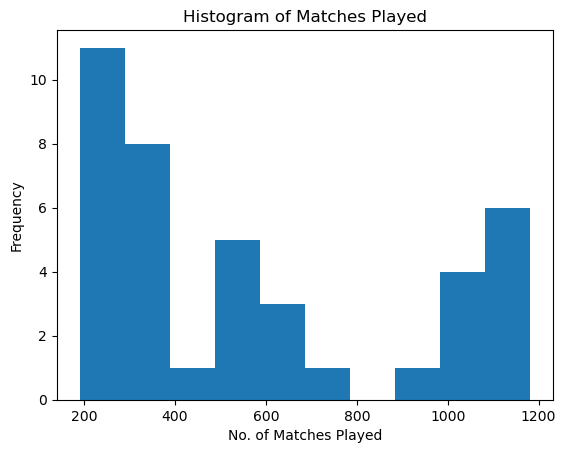

In [131]:
# Let us visualize each column

# First let us start with Matches Played column
# plot histogram
plt.hist(dataset['Matches Played'])

# add labels and title
plt.xlabel('No. of Matches Played')
plt.ylabel('Frequency')
plt.title('Histogram of Matches Played')

The histogram clearly illustrates that the majority of teams have played between 200 and 400 matches. However, there are a few teams that have played an exceptionally high number of matches, standing out from the rest.

Given that some clubs are already owned by competitors, the firm aims to identify clubs they can approach and potentially invest in. The focus is on finding clubs that, despite having less experience in the Premier League, show promise for future success.

In [133]:
# Identify teams who have played more than 900 matches

dataset[dataset['Matches Played']>=900]['Club']

0               Arsenal
1           Aston Villa
9               Chelsea
13              Everton
18            Liverpool
19      Manchester City
20    Manchester United
22     Newcastle United
29          Southampton
33    Tottenham Hotspur
36      West Ham United
Name: Club, dtype: object

Upon analysis, we have identified 11 clubs with significantly more experience in the Premier League, having played a higher number of matches and established themselves as seasoned competitors.

To align with the client's requirements of identifying potential clubs that may perform well in the future despite having less Premier League experience, we have decided to exclude these 11 established clubs from our analysis. Their presence may skew the results and obscure less experienced clubs with high potential.

By removing these experienced clubs, we can focus on the remaining clubs and potentially uncover hidden gems that may have been overlooked due to their limited experience in the league.

In [135]:
dataset[dataset['Matches Played'] < 900]

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
2,Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011
3,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012
4,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012
5,Bournemouth,219,64,107,48,269,45,1899,0.0,0,2023
6,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023
7,Burnley,304,83,145,76,300,78,1882,0.0,0,2022
8,Charlton Athletic,304,93,129,82,342,91,1905,0.0,0,2007
10,Coventry City,354,99,143,112,387,92,NaN,0.0,0,2001
11,Crystal Palace,532,153,241,138,576,133,1861,0.0,0,2023
12,Derby County,266,68,128,70,271,66,1884,0.0,0,2008


In [137]:
#Filter the dataframe and reset the index
dataset = dataset[dataset['Matches Played'] < 900].reset_index(drop=True)

In [141]:
#view data

dataset.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
0,Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012
2,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012
3,Bournemouth,219,64,107,48,269,45,1899,0.0,0,2023
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023


In [143]:
# Shape of data

dataset.shape

(29, 11)

In [ ]:
#Reviewing based on Win, Loss, Drawn, and clean sheets column

It is essential to note that each column represents the cumulative scores of each team. To accurately analyze the performance of the teams, we must normalize the data by dividing the number of wins, losses, draws, clean sheets, and goals by the number of matches played. This normalization provides a fair comparison of team performances.

In [144]:
# Create new columns for Winning Rate, Loss Rate, Draw Rate, & Clean Sheet Rate
dataset['Winning Rate'] = (dataset['Win'] / dataset['Matches Played'])*100
dataset['Loss Rate'] = (dataset['Loss'] / dataset['Matches Played'])*100
dataset['Drawn Rate'] = (dataset['Drawn'] / dataset['Matches Played'])*100
dataset['Clean Sheet Rate'] = (dataset['Clean Sheets'] / dataset['Matches Played'])*100

In [146]:
dataset.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate
0,Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011,27.443609,41.729323,30.827068,24.812030
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414
2,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012,30.161943,43.927126,25.910931,21.862348
3,Bournemouth,219,64,107,48,269,45,1899,0.0,0,2023,29.223744,48.858447,21.917808,20.547945
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023,27.981651,38.990826,33.027523,26.605505


In [147]:
# Create a column for average goals scored per match

dataset['Avg Goals Per Match']=dataset['Goals']/dataset['Matches Played']

dataset['Avg Goals Per Match']=dataset['Avg Goals Per Match'].round()

In [149]:
# View data
dataset.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match
0,Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011,27.443609,41.729323,30.827068,24.812030,1.0
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0
2,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012,30.161943,43.927126,25.910931,21.862348,1.0
3,Bournemouth,219,64,107,48,269,45,1899,0.0,0,2023,29.223744,48.858447,21.917808,20.547945,1.0
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023,27.981651,38.990826,33.027523,26.605505,1.0


Therefore we can note that new columns are successfully added 

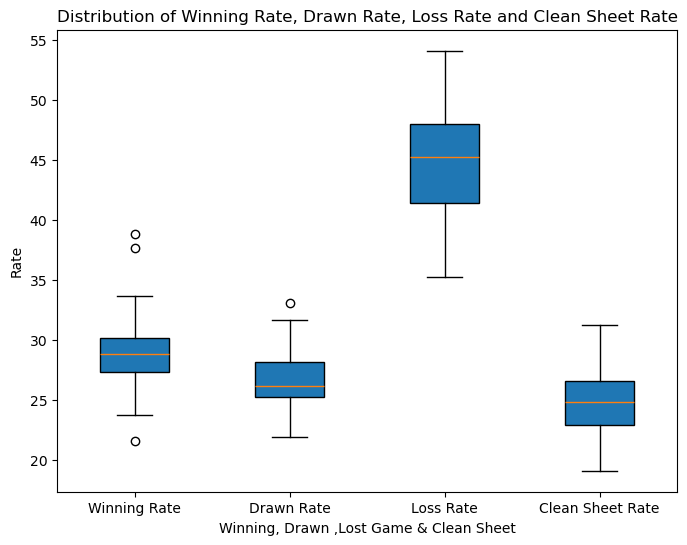

In [151]:
# Now let us visualize Winning, Loss, Drawn rate, and Clean Sheet

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the boxplot
boxplot = plt.boxplot([dataset['Winning Rate'], dataset['Drawn Rate'], dataset['Loss Rate'], dataset['Clean Sheet Rate']], 
                      patch_artist=True,
                      labels=['Winning Rate', 'Drawn Rate', 'Loss Rate', 'Clean Sheet Rate'])

# Set the title and axis labels
plt.title('Distribution of Winning Rate, Drawn Rate, Loss Rate and Clean Sheet Rate')
plt.xlabel('Winning, Drawn ,Lost Game & Clean Sheet')
plt.ylabel('Rate')

# Show the plot
plt.show()

The above histogram shows outliers and provides additional insights:

From the winning rate, we observe that there are two clubs that have performed exceptionally compared to other clubs.
For the draw rate, one club stands out as an outlier.
Additionally, the histogram reveals the overall distribution of winning and draw rates across all clubs, highlighting the general trends and variations.
It also helps identify the range within which most clubs' winning and draw rates fall, offering a clearer picture of the typical performance levels.

Inshort
Winning Rate

We observe that there are a few outliers in the Winning Rate boxplot, located above the upper whisker. These outlier clubs have shown exceptional winning rates compared to the others. We will identify these clubs ahead. Additionally, we will also identify the club with the least Winning Rate.

Drawn Rate

The Drawn Rate boxplot reveals an outlier, indicating that one club has a much higher drawn rate compared to others. This may not necessarily be positive, as it suggests the club might struggle to secure wins. We will identify this club further.

Loss Rate

The Loss Rate boxplot shows that loss rates for these clubs are higher compared to their winning rates, indicating a general trend of poor performance.

Clean Sheet Rate

The Clean Sheet Rate data appears to be quite symmetric, suggesting a balanced distribution of clean sheet rates among the clubs.

In [152]:
# Winning Rate further analysis. Identify clubs with high winning rate

# Calculate the interquartile range for the "Winning Rate" column
Q1 = dataset['Winning Rate'].quantile(0.25)
Q3 = dataset['Winning Rate'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the upper boundaries for potential outliers <-- Expectional high winning rate compared to other teams
upper_bound = Q3 + 1.5 * IQR

# Identify the clubs with high winning rate 
highwinningrate = dataset[(dataset['Winning Rate'] > upper_bound)]
highwinningrate

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0
12,Leeds United,574,223,202,149,784,179,1919,0.0,0,2023,38.850174,35.191638,25.958188,31.184669,1.0


Upon analyzing the data, we have found that two teams, Leeds United and Blackburn Rovers, have exceptionally high winning rates of 39% and 38% respectively.

In [153]:
# Winning Rate further analysis. Identify club with low winning rate

# Calculate the lower boundaries for potential outliers <-- Low winning rate compared to other teams
lower_bound = Q1 - 1.5 * IQR

# Identify the clubs with lowest winning rate 
lowwinningrate = dataset[(dataset['Winning Rate'] < lower_bound)]
lowwinningrate

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match
17,Hull City,190,41,101,48,181,58,1904,0.0,0,2017,21.578947,53.157895,25.263158,30.526316,1.0


Club is lowest winning rate of 22% is Hull City

In [154]:
# Drawn Rate further analysis. Identify club with high drawn rate
# Calculate the interquartile range for the "Drawn Rate" column
Q1 = dataset['Drawn Rate'].quantile(0.25)
Q3 = dataset['Drawn Rate'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the upper boundaries for potential outliers <-- Expectional high winning rate compared to other teams
upper_bound = Q3 + 1.5 * IQR

# Identify the clubs with high winning rate 
highwinningrate = dataset[(dataset['Drawn Rate'] > upper_bound)]
highwinningrate

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023,27.981651,38.990826,33.027523,26.605505,1.0


Brighton & Hove Albion is expectionally high Drawn Rate of 33%

In [155]:
# Now let us explore 'Avg Goals Per Match' column

dataset['Avg Goals Per Match'].describe()

count    29.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: Avg Goals Per Match, dtype: float64

As you can see we can't infer much from this metric. Therefore we will not use it for further analysis.

In [158]:

# Let us explore columns 'Winners' and 'Runners-up'

dataset['Winners'].value_counts()

Winners
0.0    27
1.0     2
Name: count, dtype: int64

In [159]:
dataset['Runners-up'].value_counts()

Runners-up
0    28
1     1
Name: count, dtype: Int64

Therefore, from the above dataset, we can infer that there are two clubs that have won the Premier League and one club that has been the runner-up.Identify those clubs

In [160]:
dataset[(dataset['Winners']==1) | (dataset['Runners-up']==1)]

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0
13,Leicester City,642,216,262,164,860,167,1884,1.0,0,2023,33.644860,40.809969,25.545171,26.012461,1.0


Blackburn Rovers have won Premier League once and been an Runners-up once and Leicester City has won Premier League once.

In [161]:
# Lets us again analyse Matches Played Column for our reduced dataframe (29 clubs).

dataset['Matches Played'].describe()

count     29.000000
mean     372.482759
std      153.533296
min      190.000000
25%      266.000000
50%      305.000000
75%      494.000000
max      696.000000
Name: Matches Played, dtype: float64

The average matches played are 372

In [162]:
# Let us look at "lastplayed_pl" column
dataset['lastplayed_pl'].value_counts()

lastplayed_pl
2023    8
2022    3
2017    3
2018    3
2012    2
2011    1
2007    1
2001    1
2008    1
2002    1
2015    1
2021    1
2000    1
2013    1
2010    1
Name: count, dtype: int64

Out of the total 29 teams, eight are currently playing in the Premier League. Since these teams are currently active in the league, it makes sense to prioritize them in our analysis. However, there are also teams that date back as early as 2000. It may be appropriate to assign these teams less weight.

In [163]:
# Let us check the eight teams that are currently playing in the Premier League

dataset[dataset['lastplayed_pl']==2023]['Club']

3                 Bournemouth
4      Brighton & Hove Albion
8              Crystal Palace
10                     Fulham
12               Leeds United
13             Leicester City
16          Nottingham Forest
27    Wolverhampton Wanderers
Name: Club, dtype: object

Giving more priority to teams that have more recent experience playing in the Premier League is ideal. When making the final decision, we will assign higher weight to teams that have played more recently, and lesser weight to those that have not played recently.

### D) Final Recommendations Framework

Let's create a plan to score each team based on predefined metrics:

- **Experience in the Premier League**: Give a score of 10 if the club has relatively high experience, above the average of 372 matches.
- **Winning Rate**: Give a score of 15 if the club's winning rate is above the third quartile (Q3).
- **Losing Rate**: Give a score of 15 if the club's losing rate is below the first quartile (Q1).
- **Drawn Rate and Losing Rate**: Give a score of 10 if the club's drawn rate is below the first quartile (Q1) and the losing rate is below Q1.
- **Clean Sheet Rate and Winning Rate**: Give a score of 10 if the club's clean sheet rate is above the third quartile (Q3) and the winning rate is above Q3.
- **Premier League Wins**: Give a score of 15 if the club has won the Premier League.
- **Premier League Runners-up**: Give a score of 10 if the club has been a runner-up in the Premier League.
- **Current Participation in Premier League**: Give a score of 15 if the club is currently playing in the Premier League.

In [164]:
# Calculate the upper bound for the "Winning Rate" column
upper_bound_WinningRate = dataset['Winning Rate'].quantile(0.75)

# Calculate the lower bound for the "Loss Rate" column
lower_bound_LosingRate = dataset['Loss Rate'].quantile(0.25)

# Calculate the lower bound for the "Drawn Rate" column
lower_bound_DrawnRate = dataset['Drawn Rate'].quantile(0.25)

# Calculate the upper bound for the "Drawn Rate" column
upper_bound_CleanSheetRate = dataset['Clean Sheet Rate'].quantile(0.75)

In [165]:
len(dataset)

29

In [166]:
dataset['scores']=np.zeros(len(dataset))

In [167]:
dataset.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match,scores
0,Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011,27.443609,41.729323,30.827068,24.812030,1.0,0.0
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0,0.0
2,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012,30.161943,43.927126,25.910931,21.862348,1.0,0.0
3,Bournemouth,219,64,107,48,269,45,1899,0.0,0,2023,29.223744,48.858447,21.917808,20.547945,1.0,0.0
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023,27.981651,38.990826,33.027523,26.605505,1.0,0.0


In [168]:
dataset.loc[dataset['Matches Played'] >= 372, 'scores'] += 10
dataset.loc[dataset['Winning Rate'] >= upper_bound_WinningRate, 'scores'] += 15
dataset.loc[dataset['Loss Rate'] <= lower_bound_LosingRate, 'scores'] += 15
dataset.loc[(dataset['Drawn Rate'] <= lower_bound_DrawnRate) & (dataset['Loss Rate'] <= lower_bound_LosingRate), 'scores'] += 10
dataset.loc[(dataset['Clean Sheet Rate'] >= upper_bound_CleanSheetRate) & (dataset['Winning Rate'] >= upper_bound_WinningRate), 'scores'] += 10
dataset.loc[dataset['Winners'] == 1, 'scores'] += 15
dataset.loc[dataset['Runners-up'] == 1, 'scores'] += 10
dataset.loc[dataset['lastplayed_pl'] == 2023, 'scores'] += 15

In [169]:
dataset.head() 

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match,scores
0,Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011,27.443609,41.729323,30.827068,24.812030,1.0,0.0
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0,75.0
2,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012,30.161943,43.927126,25.910931,21.862348,1.0,25.0
3,Bournemouth,219,64,107,48,269,45,1899,0.0,0,2023,29.223744,48.858447,21.917808,20.547945,1.0,15.0
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023,27.981651,38.990826,33.027523,26.605505,1.0,30.0


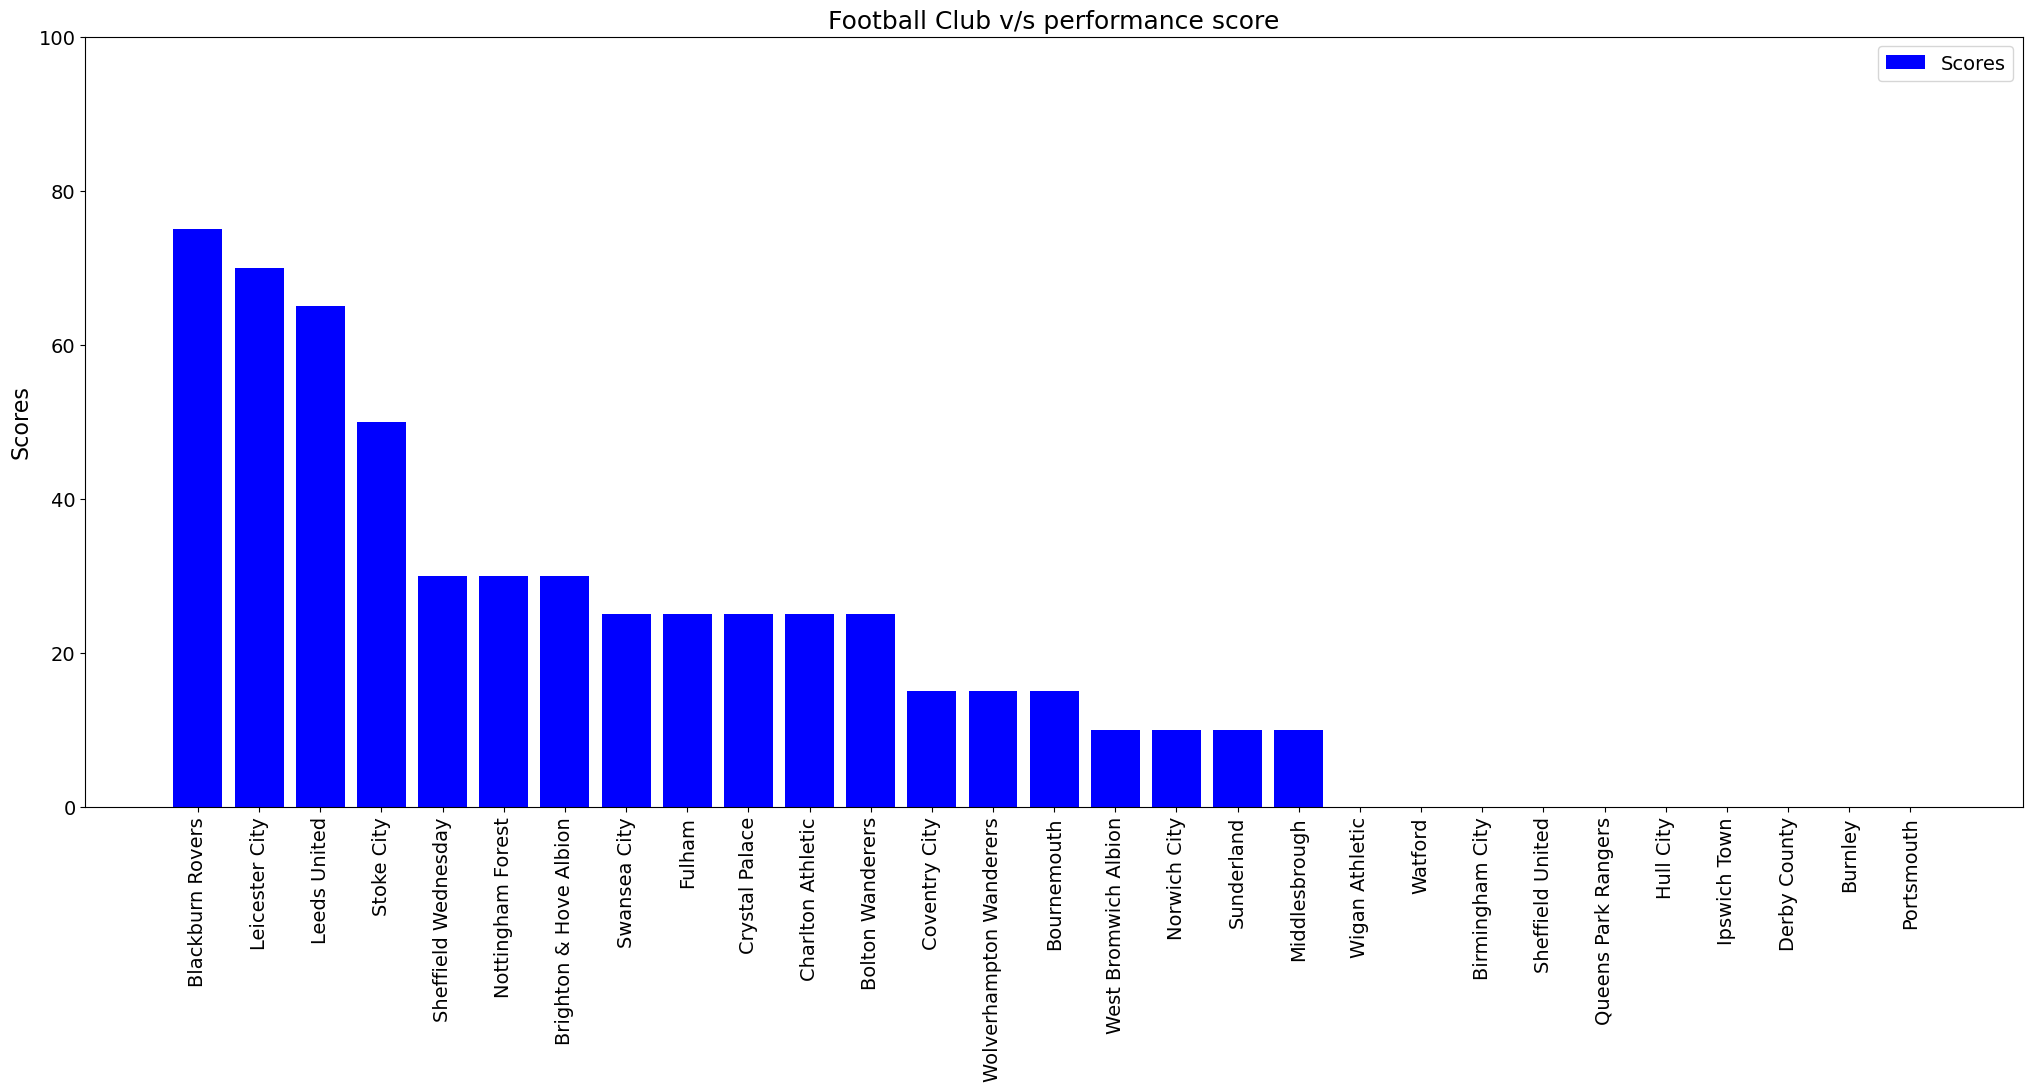

In [170]:
# sort the DataFrame by score in descending order
dataset_sort = dataset.sort_values(by='scores', ascending=False)

# create a bar chart of team scores
plt.figure(figsize=(25,10))
plt.bar(dataset_sort['Club'], dataset_sort['scores'], color='blue')

# add labels and title to the chart
plt.ylabel('Scores', fontsize=16)
plt.title('Football Club v/s performance score', fontsize=18)

# add legend to explain the blue bars
plt.legend(['Scores'], fontsize=14)

# rotate the team names on the x-axis for readability
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)

# set the y-axis limit to start from 0 and end at 100
plt.ylim(0, 100)

# display the chart
plt.show()

Based on the above chart, Blackburn Rovers has the highest score basis our analysis and second best Leicester City

To ensure a thorough evaluation of football club performance we must consider clubs current form.

Let us check the score of those clubs that have played in the last three years. Specifically, suggest including clubs that have played in 2023, as well as those that last played in 2022 and 2021.

This approach allows us to pinpoint those clubs that are currently in good form and have consistently performed well over the past few years.

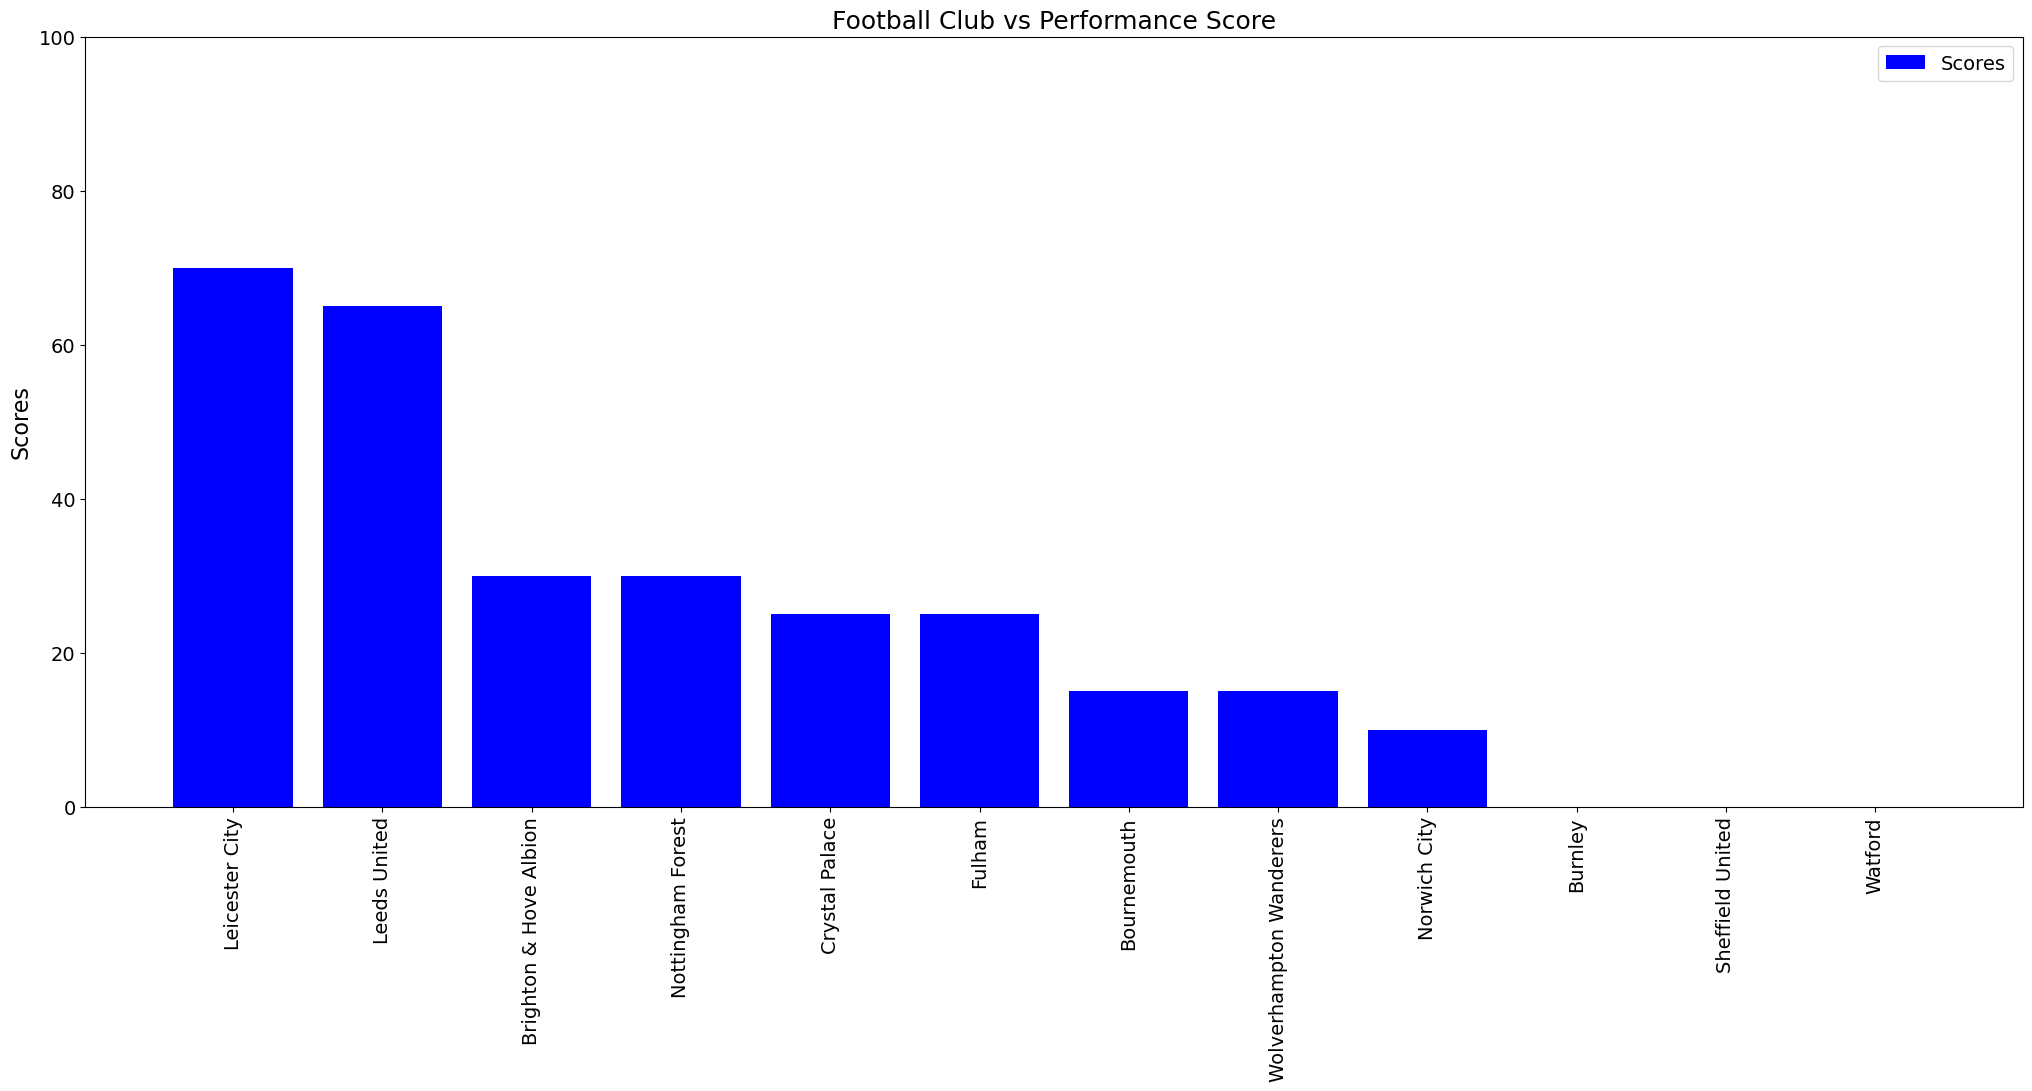

In [171]:
# Sort the DataFrame by score in descending order for specified years
df_sort = dataset[(dataset['lastplayed_pl'] == 2023) | (dataset['lastplayed_pl'] == 2022) | (dataset['lastplayed_pl'] == 2021)].sort_values(by='scores', ascending=False)

# Create a bar chart of team scores
plt.figure(figsize=(25, 10))
plt.bar(df_sort['Club'], df_sort['scores'], color='blue')

# Add labels and title to the chart
plt.ylabel('Scores', fontsize=16)
plt.title('Football Club vs Performance Score', fontsize=18)

# Add legend to explain the blue bars
plt.legend(['Scores'], fontsize=14)

# Rotate the team names on the x-axis for readability
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)

# Set the y-axis limit to start from 0 and end at 100
plt.ylim(0, 100)

# Display the chart
plt.show()

Upon closer examination of the list, we can observe that our current leader, Blackburn Rovers, is not included. To gain a better understanding of their performance, it's necessary to investigate further and determine the last year in which Blackburn Rovers played. This information will provide crucial context to our analysis and enable us to assess their recent form accurately.

In [172]:
dataset[dataset['Club']=='Blackburn Rovers']['lastplayed_pl']

1    2012
Name: lastplayed_pl, dtype: int32

In [ ]:
Secondary research - 